# Combination Experiments

In [1]:
import sys

# I'm getting a bit hacky here, to access the statistics_generator directly instead of parsing the output file
sys.path.insert(1, '../toxic-comment-collection')

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datasets

import statistics_generator

In [2]:
sg = statistics_generator.Statistics_generator('../toxic-comment-collection/files')
statistic = sg.generate()

# sg._generate_file_statistics('../toxic-comment-collection/files/basile2019/basile2019en.csv')

Assumption: Datasets can be combined when they share a label --> go over all datasets and test if they can be combined

What to do with "none"? Should we delete it?

In [3]:
for ds1 in statistic[0]:
    for ds2 in statistic[0]:
        same_labels = 0
        for label in statistic[0][ds1]["labels"]:
            if (label != "none" and label in statistic[0][ds2]["labels"]):
                same_labels += 1
        print("{0} ".format(same_labels), end ="")
    print()

7 7 7 7 2 1 1 2 1 1 1 1 1 0 0 0 2 2 2 1 1 2 1 1 1 2 2 2 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 
7 7 7 7 2 1 1 2 1 1 1 1 1 0 0 0 2 2 2 1 1 2 1 1 1 2 2 2 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 
7 7 7 7 2 1 1 2 1 1 1 1 1 0 0 0 2 2 2 1 1 2 1 1 1 2 2 2 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 
7 7 7 7 2 1 1 2 1 1 1 1 1 0 0 0 2 2 2 1 1 2 1 1 1 2 2 2 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 
2 2 2 2 2 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 2 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 0 2 2 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 
1 1 1 1 0 2 2 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 
2 2 2 2 1 1 1 2 1 1 1 1 1 0 0 0 2 2 2 1 1 1 1 1 1 1 1 2 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 
1 1 1 1 1 0 0 1 3 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 0 0 1 1 1 2 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 0 0 1 1 1 1

# Generate Data for Heatmap (without filtering)

In [4]:
data = {}

for ds1 in statistic[0]:
    ds1_name = ds1.split(".")[0].split("_")[0]
    if ds1_name in data:
        data[ds1_name + "1"] = data.pop(ds1_name)
        k = 2
        while ds1_name + str(k) in data:
            k += 1
        ds1_name = ds1_name + str(k)
    data[ds1_name] = {}
    
    for ds2 in statistic[0]:
        same_labels = 0
        for label in statistic[0][ds1]["labels"]:
            if (label in statistic[0][ds2]["labels"]):
                same_labels += 1
        ds2_name = ds2.split(".")[0].split("_")[0]
        
        if ds2_name in data[ds1_name]:
            data[ds1_name][ds2_name + "1"] = data[ds1_name].pop(ds2_name)
            k = 2
            while ds2_name + str(k) in data[ds1_name]:
                k += 1
            ds2_name = ds2_name + str(k)
        data[ds1_name][ds2_name] = same_labels/len(statistic[0][ds1]["labels"])

df = pd.DataFrame(data)

# Generate Data for Heatmap (with filtering)

In [5]:
cleaned_stat = {}

for i in statistic[0]:
    d = {"labels": {}}
    for j in statistic[0][i]["labels"]:
        if j != "none":
            d["labels"][j] = statistic[0][i]["labels"][j]
    cleaned_stat[i] = d

data = {}
for ds1 in cleaned_stat:
    data[ds1] = {}
    for ds2 in cleaned_stat:
        same_labels = 0
        for label in cleaned_stat[ds1]["labels"]:
            if (label in cleaned_stat[ds2]["labels"]):
                same_labels += 1
        data[ds1][ds2] = same_labels/len(cleaned_stat[ds1]["labels"])

df = pd.DataFrame(data)

# Generate Data for Heatmap (without filtering) - updated

In [6]:
# Merge Albadi Papers

del_list = []

new = {"rows": 0, 'file size': 0, 'labels': {}}

for i in statistic[0]:
    if "albadi" in i:
        print(i)
        del_list.append(i)
        new["rows"] += statistic[0][i]['rows']
        new['file size'] += statistic[0][i]['file size']
        for label in statistic[0][i]['labels']:
            if label in new['labels']:
                new['labels'][label] += statistic[0][i]['labels'][label]
            else:
                new['labels'][label] = statistic[0][i]['labels'][label]
        print(statistic[0][i])
        
statistic[0]["albadi2018ar.csv"] = new
        
for i in del_list:
    del statistic[0][i]

albadi2018ar_train.csv
{'rows': 3189, 'file size': 901050, 'labels': {'none': 1877, 'hate': 1312}}
albadi2018ar_test.csv
{'rows': 293, 'file size': 84901, 'labels': {'none': 177, 'hate': 116}}


# Sort the papers

In [7]:
sorted_keys = [
'bretschneider2016en_lol.csv',
'bretschneider2016en_wow.csv',
'waseem2016en.csv',
'alfina2017id.csv',
'ross2018de.csv',
'bretschneider2017en.csv',
'davidson2017en.csv',
'gao2018en.csv',
'jha2017en.csv',
'mubarak2017ar_twitter.csv',
'mubarak2017ar_aljazeera.csv',
'wulczyn2017en_toxic.csv',
'wulczyn2017en_aggressive.csv',
'wulczyn2017en_attack.csv',
'albadi2018ar.csv',
'elSherief2018en.csv',
'founta2018en.csv',
'gibert2018en.csv',
'ibrohim2018id.csv',
'kumar2018hing.csv',
'mathur2018hing.csv',
'sanguinetti2018it.csv',
'wiegand2018de.csv',
'basile2019en.csv',
'chung2019.csv',
'fortuna2019pt.csv',
'ibrohim2019id.csv',
'mandl2019en.csv',
'mandl2019ger.csv',
'mandl2019hind.csv',
'mulki2019ar.csv',
'ousidhoum2019ar.csv',
'ousidhoum2019en_with_stopwords.csv',
'ousidhoum2019en.csv',
'ousidhoum2019fr.csv',
'qian2019en_gab.csv',
'qian2019en_reddit.csv',
'zampieri2019en.csv',
'coltekin2019tr.csv',
'pitenis2020gr.csv',
'sigurbergsson2019da.csv',
'kulkarni2021mr.csv',
'novak2021sl.csv',
]

for idx,el in enumerate(sorted_keys):
    print(idx+1, el)

1 bretschneider2016en_lol.csv
2 bretschneider2016en_wow.csv
3 waseem2016en.csv
4 alfina2017id.csv
5 ross2018de.csv
6 bretschneider2017en.csv
7 davidson2017en.csv
8 gao2018en.csv
9 jha2017en.csv
10 mubarak2017ar_twitter.csv
11 mubarak2017ar_aljazeera.csv
12 wulczyn2017en_toxic.csv
13 wulczyn2017en_aggressive.csv
14 wulczyn2017en_attack.csv
15 albadi2018ar.csv
16 elSherief2018en.csv
17 founta2018en.csv
18 gibert2018en.csv
19 ibrohim2018id.csv
20 kumar2018hing.csv
21 mathur2018hing.csv
22 sanguinetti2018it.csv
23 wiegand2018de.csv
24 basile2019en.csv
25 chung2019.csv
26 fortuna2019pt.csv
27 ibrohim2019id.csv
28 mandl2019en.csv
29 mandl2019ger.csv
30 mandl2019hind.csv
31 mulki2019ar.csv
32 ousidhoum2019ar.csv
33 ousidhoum2019en_with_stopwords.csv
34 ousidhoum2019en.csv
35 ousidhoum2019fr.csv
36 qian2019en_gab.csv
37 qian2019en_reddit.csv
38 zampieri2019en.csv
39 coltekin2019tr.csv
40 pitenis2020gr.csv
41 sigurbergsson2019da.csv
42 kulkarni2021mr.csv
43 novak2021sl.csv


In [8]:
data = {}

for id1,ds1 in enumerate(sorted_keys):
    data[id1+1] = {}
    for id2,ds2 in enumerate(sorted_keys):
        same_labels = 0
        for label in statistic[0][ds1]["labels"]:
            if (label in statistic[0][ds2]["labels"]):
                same_labels += 1
        data[id1+1][id2+1] = same_labels/len(statistic[0][ds1]["labels"])

df = pd.DataFrame(data)

# Generate Heatmap

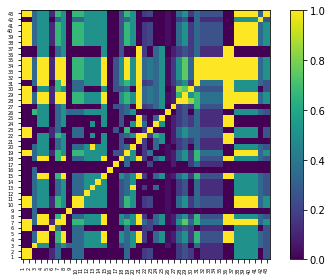

In [9]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
f = plt.pcolor(df, rasterized=False)

plt.colorbar()

#plt.axes().set_aspect('equal')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, size=5)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90, size=5)

plt.gca().set_aspect('equal')
#print(ax.get_xscale())
#ax.set_aspect('equal')
plt.tight_layout()
plt.savefig("map.pdf", bbox_inches="tight")
plt.show()


In [10]:
count = 0
for i in statistic[1]['labels']:
    if statistic[1]['labels'][i] > 100:
        count += 1
        
print(len(statistic[1]['labels']))
print(count)

126
57


In [11]:
l = ['none', 'normal', 'other', 'positive', 'appropriate']

s = 0

for i in l:
    s += statistic[1]['labels'][i]
    
print(s)

statistic[1]['labels']['idk/skip']

519076


73

# Determine which datasets can be combined for model training
Requirements:
- same language
- shared label

In [12]:
languages = {}

for i in datasets.get_datasets():
    for f in i.files:
        if not f["language"] in languages:
            languages[f["language"]] = [f["name"]]
        else:
            languages[f["language"]].append(f["name"])
            
for i in languages:
    print(i, languages[i])

ar ['ousidhoum2019ar.csv', 'mulki2019ar.csv', 'mubarak2017ar_twitter.csv', 'mubarak2017ar_aljazeera.csv', 'albadi2018ar_train.csv', 'albadi2018ar_test.csv']
en ['ousidhoum2019en_with_stopwords.csv', 'ousidhoum2019en.csv', 'davidson2017en.csv', 'gibert2018en.csv', 'gao2018en.csv', 'qian2019en_gab.csv', 'qian2019en_reddit.csv', 'waseem2016en.csv', 'jha2017en.csv', 'elSherief2018en.csv', 'mandl2019en.csv', 'mandl2019ger.csv', 'mandl2019hind.csv', 'bretschneider2017en.csv', 'basile2019en.csv', 'founta2018en.csv', 'wulczyn2017en_toxic.csv', 'wulczyn2017en_aggressive.csv', 'wulczyn2017en_attack.csv', 'zampieri2019en.csv', 'bretschneider2016en_wow.csv', 'bretschneider2016en_lol.csv']
fr ['ousidhoum2019fr.csv']
en/fr/it ['chung2019.csv']
de ['ross2018de.csv', 'wiegand2018de.csv']
gr ['pitenis2020gr.csv', 'novak2021sl.csv']
hing ['mathur2018hing.csv', 'kumar2018hing.csv']
id ['alfina2017id.csv', 'ibrohim2019id.csv', 'ibrohim2018id.csv']
it ['sanguinetti2018it.csv']
pt ['fortuna2019pt.csv']
tr [

In [13]:
len(languages)

13

In [14]:
for lang in languages:
    labels = []
    matrix = {}
    
    for ds in languages[lang]:
        if ds in statistic[0]:
            for label in statistic[0][ds]["labels"]:
                if not label in labels:
                    labels.append(label)
    
    for ds in languages[lang]:
        if ds in statistic[0]:
            l = []
            for label in labels:
                if label in statistic[0][ds]["labels"]:
                    l.append(1)
                else:
                    l.append(0)
            matrix[ds] = l
    
    print(lang)
    print(labels)
    print()
    for i in matrix:
        print(matrix[i], i)
    print()

ar
['indirect', 'none', 'offensive', 'direct', 'hate', 'disrespectful', 'abusive', 'fearful', 'obscene']

[1, 1, 1, 1, 1, 1, 1, 1, 0] ousidhoum2019ar.csv
[0, 1, 0, 0, 1, 0, 1, 0, 0] mulki2019ar.csv
[0, 1, 1, 0, 0, 0, 0, 0, 1] mubarak2017ar_twitter.csv
[0, 1, 1, 0, 0, 0, 0, 0, 1] mubarak2017ar_aljazeera.csv

en
['offensive', 'indirect', 'none', 'direct', 'hate', 'disrespectful', 'abusive', 'fearful', 'relation', 'idk/skip', 'sexism', 'racism', 'hostile', 'benevolent', 'gender_cunt', 'disability_retarded', 'disability_retard', 'gender_twat', 'sexorient_faggot', 'ethn_nigger', 'class_redneck', 'class_whitetrash', 'ethn_whitetrash', 'prohatespeech', 'gender_dyke', 'sexorient_dyke', 'ethnicity', 'white', 'archaic_hillbilly', 'ethn_trailertrash', 'class_conspiracytheorist', 'gender_bint', 'class_rube', 'ethn_spic', 'religious', 'islamophobia', 'nation_limey', 'black', 'ethn_wetback', 'ethn_trailerparktrash', 'rel_muzzie', 'class_trailerparktrash', 'ethn_housenigger', 'nation_wigger', 'archai

In [15]:
labels = {}
for ds1 in statistic[0]:
    for label in statistic[0][ds1]["labels"]:
        if label in labels:
            labels[label].append(ds1)
        else:
            labels[label] = [ds1]
print(json.dumps(labels, indent=2))

{
  "indirect": [
    "ousidhoum2019ar.csv",
    "ousidhoum2019en_with_stopwords.csv",
    "ousidhoum2019en.csv",
    "ousidhoum2019fr.csv"
  ],
  "none": [
    "ousidhoum2019ar.csv",
    "ousidhoum2019en_with_stopwords.csv",
    "ousidhoum2019en.csv",
    "ousidhoum2019fr.csv",
    "mulki2019ar.csv",
    "mubarak2017ar_twitter.csv",
    "mubarak2017ar_aljazeera.csv",
    "davidson2017en.csv",
    "gibert2018en.csv",
    "gao2018en.csv",
    "waseem2016en.csv",
    "mandl2019en.csv",
    "mandl2019ger.csv",
    "ross2018de.csv",
    "pitenis2020gr.csv",
    "alfina2017id.csv",
    "ibrohim2018id.csv",
    "fortuna2019pt.csv",
    "coltekin2019tr.csv",
    "wulczyn2017en_toxic.csv",
    "wulczyn2017en_aggressive.csv",
    "wulczyn2017en_attack.csv",
    "sigurbergsson2019da.csv",
    "kulkarni2021mr.csv",
    "novak2021sl.csv",
    "kumar2018hing.csv",
    "zampieri2019en.csv",
    "albadi2018ar.csv"
  ],
  "offensive": [
    "ousidhoum2019ar.csv",
    "ousidhoum2019en_with_stopwords.cs